# Humza Khalid, 11-7-2025

-_Real Madrid League Soccer Analysis (2024-2025)_

-_Web Scraping and Data Analysis Project_

-_This analysis project scrapes data from a website and creates visual  data analysis amongst the questions being given._

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import io
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.set_palette("husl")


In [2]:
url = "https://en.wikipedia.org/wiki/2024%E2%80%9325_Real_Madrid_CF_season"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}


In [3]:
response = requests.get(url, headers=headers)
response.raise_for_status()   # ensures request succeeded

# Step 2 — Read all tables from HTML text (not from URL directly)
tables = pd.read_html(response.text)

# Step 3 — Save every table as a CSV
for i, df in enumerate(tables):
    filename = f"real_madrid_table_{i}.csv"
    df.to_csv(filename, index=False)
    print(f"Saved table {i} → {filename}")

print("\nAll tables saved successfully.")

Saved table 0 → real_madrid_table_0.csv
Saved table 1 → real_madrid_table_1.csv
Saved table 2 → real_madrid_table_2.csv
Saved table 3 → real_madrid_table_3.csv
Saved table 4 → real_madrid_table_4.csv
Saved table 5 → real_madrid_table_5.csv
Saved table 6 → real_madrid_table_6.csv
Saved table 7 → real_madrid_table_7.csv
Saved table 8 → real_madrid_table_8.csv
Saved table 9 → real_madrid_table_9.csv
Saved table 10 → real_madrid_table_10.csv
Saved table 11 → real_madrid_table_11.csv
Saved table 12 → real_madrid_table_12.csv
Saved table 13 → real_madrid_table_13.csv
Saved table 14 → real_madrid_table_14.csv
Saved table 15 → real_madrid_table_15.csv
Saved table 16 → real_madrid_table_16.csv
Saved table 17 → real_madrid_table_17.csv
Saved table 18 → real_madrid_table_18.csv
Saved table 19 → real_madrid_table_19.csv
Saved table 20 → real_madrid_table_20.csv
Saved table 21 → real_madrid_table_21.csv
Saved table 22 → real_madrid_table_22.csv
Saved table 23 → real_madrid_table_23.csv
Saved table 

_Question 1) Which player  has the highest average goals among their players in 24-25 season?_

In [4]:

df = pd.read_csv("real_madrid_table_91.csv")


df_clean = df[df["Player"].str.lower() != "total"]


df_sorted = df_clean.sort_values(by="Total", ascending=False)


top_scorer = df_sorted.iloc[0]

print("Top Scorer:")
print(f"{top_scorer['Player']} — {top_scorer['Total']} goals")


print("\nTop 5 players by goals:")
print(df_sorted[["Player", "Total"]].head())

Top Scorer:
Kylian Mbappé — 44 goals

Top 5 players by goals:
              Player  Total
0      Kylian Mbappé     44
1    Vinícius Júnior     22
2    Jude Bellingham     15
3            Rodrygo     14
4  Federico Valverde     11


#Mat PLot, Question 1)

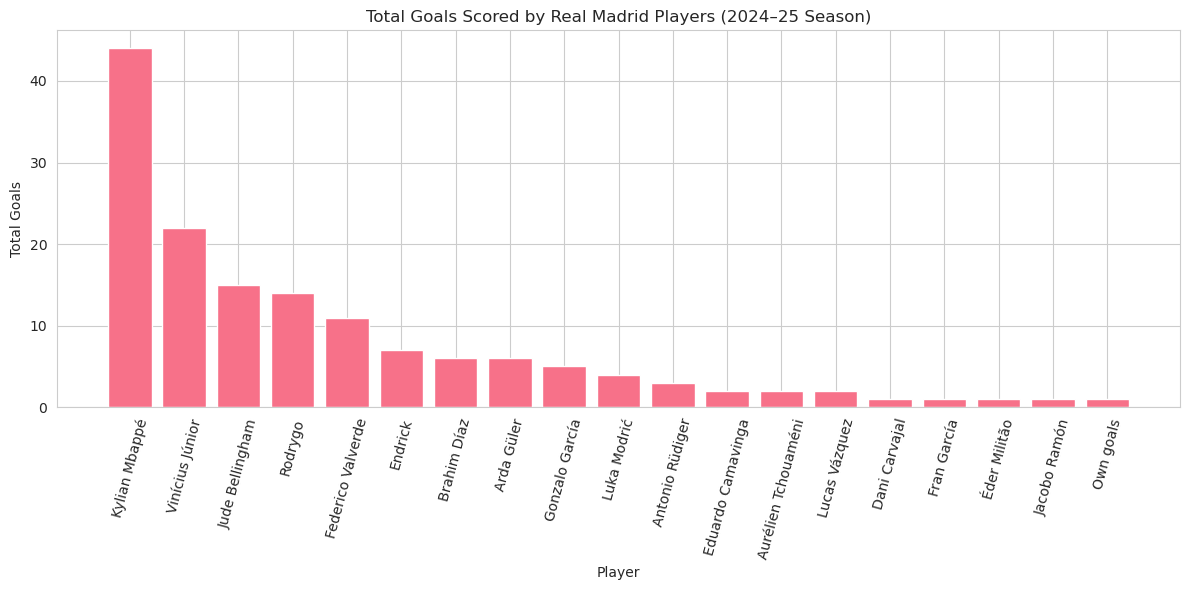

In [5]:
plt.figure(figsize=(12,6))
plt.bar(df_sorted["Player"], df_sorted["Total"])
plt.xticks(rotation=75)
plt.xlabel("Player")
plt.ylabel("Total Goals")
plt.title("Total Goals Scored by Real Madrid Players (2024–25 Season)")
plt.tight_layout()
plt.show()

#This plot indicates which player had the most goals scored throughout the team the entire season.

_Question 2) Which player has the most amount of rewards?_

In [6]:


# Load the CSV file
df = pd.read_csv('real_madrid_table_96.csv')

# Step 1: Split the 'Player(s) / Coach' column by '  ' (double space)
# This handles awards won by multiple people
df['Player(s) / Coach Split'] = df['Player(s) / Coach'].str.split('  ')

# Step 2: Explode the DataFrame to have one row per player/coach
exploded_df = df.explode('Player(s) / Coach Split')

# Step 3: Count the awards for each player/coach
award_counts = exploded_df['Player(s) / Coach Split'].value_counts()

# The player/coach with the most awards is the first item in the Series
most_awarded_person = award_counts.index[0]
max_awards = award_counts.iloc[0]

print("Award Counts:")
print(award_counts)
print(f"\nThe player/coach with the most awards is: {most_awarded_person} with {max_awards} awards.")

# Save the award counts to a CSV file
award_counts_df = award_counts.rename_axis('Player / Coach').to_frame('Award Count')
award_counts_df.to_csv('player_award_counts.csv')

Award Counts:
Player(s) / Coach Split
Vinícius Júnior      7
Kylian Mbappé        4
Carlo Ancelotti      3
Jude Bellingham      3
Antonio Rüdiger      3
Dani Carvajal        2
Toni Kroos           2
Thibaut Courtois     1
Federico Valverde    1
Name: count, dtype: int64

The player/coach with the most awards is: Vinícius Júnior with 7 awards.


#Mat Plot, Question 2)

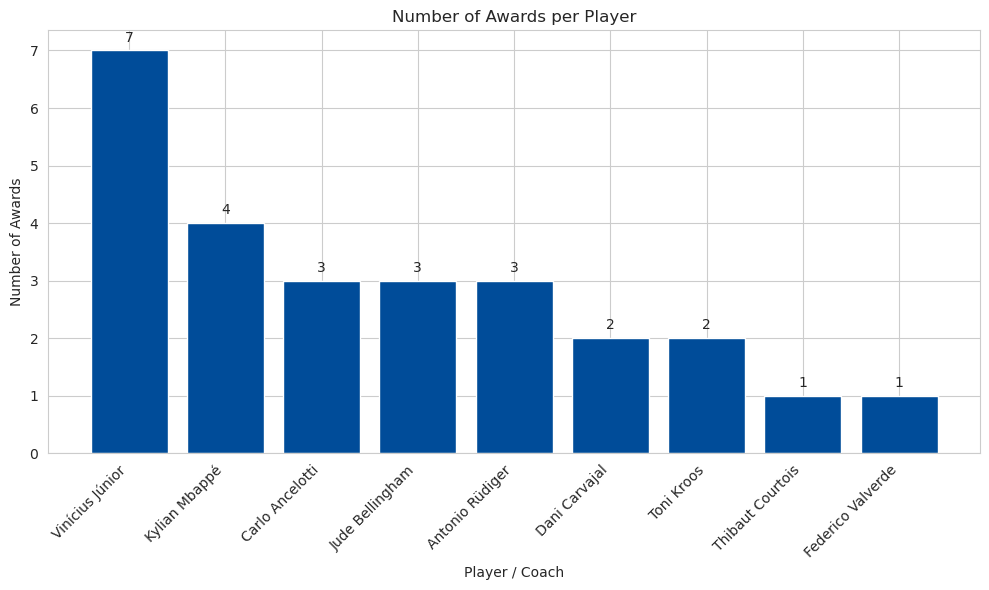

In [8]:
players = award_counts.index
counts = award_counts.values

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
bars = ax.bar(players, counts, color='#004C99')

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=10)
# Set labels and title
ax.set_xlabel('Player / Coach')
ax.set_ylabel('Number of Awards')
ax.set_title('Number of Awards per Player')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.show()


#This plot shows which player preformed the best by recieving the most amount of awards throughout the whole season.

_Question 3) Which Player has made the least total appearances throughout the whole season?_

In [9]:
# Load the CSV file, using 'header=1' to correctly capture 'Apps' and 'Goals' metrics
df = pd.read_csv('real_madrid_table_90.csv', header=1)

# Select the relevant columns: Player and the first 'Apps' column (Total Appearances)
total_apps_df = df[['Player', 'Apps']].copy()

# Sort the DataFrame by 'Apps' in ascending order
total_apps_sorted = total_apps_df.sort_values(by='Apps', ascending=True)

# Identify the minimum number of appearances
min_apps = total_apps_sorted['Apps'].min()

# Identify all players who have the minimum number of appearances (handling ties)
least_apps_players = total_apps_sorted[total_apps_sorted['Apps'] == min_apps]

print("Players with the least total appearances:")
print(least_apps_players)

# Save the sorted total appearances list to a CSV file
total_apps_sorted.to_csv('player_total_appearances.csv', index=False)

Players with the least total appearances:
           Player  Apps
30   Daniel Yáñez     1
24  Fran González     1
31   Diego Aguado     1


#Mat Plot, Question 3)

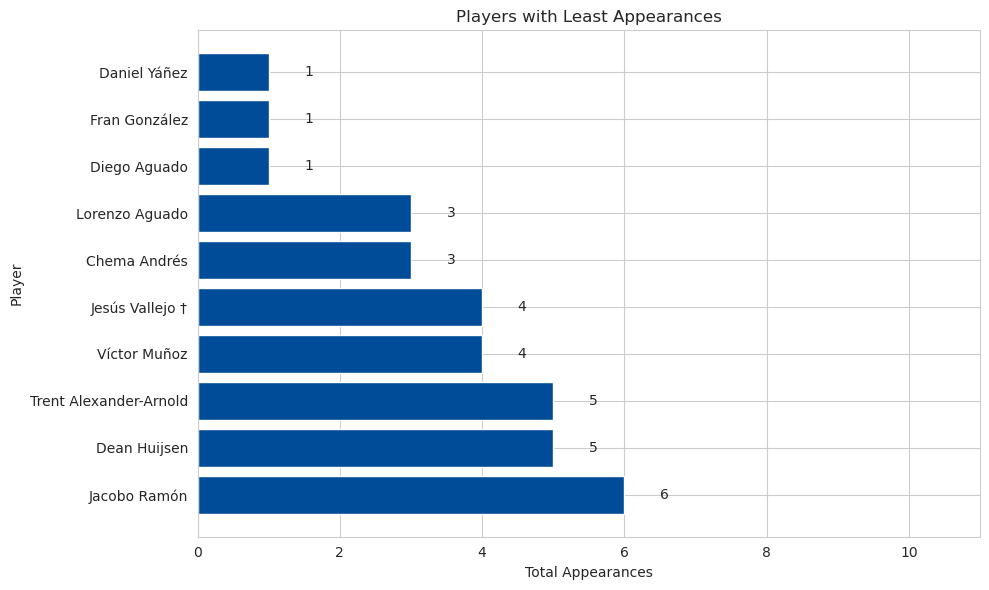

In [10]:
bottom_10_players = total_apps_sorted.head(10)

players = bottom_10_players['Player'].tolist()
counts = bottom_10_players['Apps'].tolist()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar chart (reversed so the least is at the top)
players.reverse()
counts.reverse()
bars = ax.barh(players, counts, color='#004C99')

# Add the count on the right of each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, counts[i],
            va='center', ha='left', fontsize=10)

# Set labels and title
ax.set_xlabel('Total Appearances')
ax.set_ylabel('Player')
ax.set_title('Players with Least Appearances')

# Set x-axis limit slightly larger than max count for padding
ax.set_xlim(0, max(counts) + 5)

# Adjust layout
plt.tight_layout()

plt.show()

#This plot shows players that played the least amount of games throughout the whole season.

_Question 4) Which Players had less than 3 award counts throughout the whole season?_

In [14]:
df_awards = pd.read_csv('player_award_counts.csv')


less_than_3_awards = df_awards[df_awards['Award Count'] < 3]

print("Players/Coaches with less than 3 award counts:")
print(less_than_3_awards)


less_than_3_awards.to_csv('players_less_than_3_awards.csv', index=False)

Players/Coaches with less than 3 award counts:
      Player / Coach  Award Count
5      Dani Carvajal            2
6         Toni Kroos            2
7   Thibaut Courtois            1
8  Federico Valverde            1


#Mat Plot, Question 4)

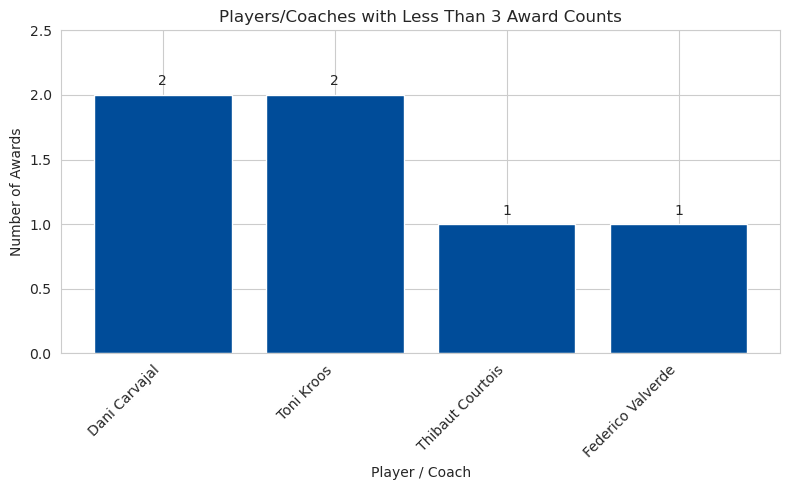

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))


bars = ax.bar(players, counts, color='#004C99')


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=10)


ax.set_xlabel('Player / Coach')
ax.set_ylabel('Number of Awards')
ax.set_title('Players/Coaches with Less Than 3 Award Counts')

# Set y-axis limit slightly larger than max count for padding
ax.set_ylim(0, max(counts) + 0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('players_less_than_3_awards_bar_chart.png')

#This Plot indicates players that had less than 3 awards throughout the whole season.